<a href="https://colab.research.google.com/github/siddharthchd/Tensorflow_Developer/blob/main/Natural_Language_Processing/lessons/lesson2_sarcasm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2021-01-13 14:40:36--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 2607:f8b0:400e:c07::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2021-01-13 14:40:36 (197 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [6]:
with open('/tmp/sarcasm.json', 'r') as f:
  datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [8]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [13]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

In [14]:
import numpy as np

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [16]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [18]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs = num_epochs, validation_data = (testing_padded, testing_labels), verbose = 2)

Epoch 1/30
625/625 - 3s - loss: 0.6758 - accuracy: 0.5641 - val_loss: 0.6175 - val_accuracy: 0.6473
Epoch 2/30
625/625 - 2s - loss: 0.4603 - accuracy: 0.8185 - val_loss: 0.3934 - val_accuracy: 0.8374
Epoch 3/30
625/625 - 2s - loss: 0.3228 - accuracy: 0.8720 - val_loss: 0.3539 - val_accuracy: 0.8526
Epoch 4/30
625/625 - 2s - loss: 0.2698 - accuracy: 0.8930 - val_loss: 0.3589 - val_accuracy: 0.8381
Epoch 5/30
625/625 - 2s - loss: 0.2340 - accuracy: 0.9093 - val_loss: 0.3397 - val_accuracy: 0.8584
Epoch 6/30
625/625 - 2s - loss: 0.2050 - accuracy: 0.9219 - val_loss: 0.3428 - val_accuracy: 0.8539
Epoch 7/30
625/625 - 2s - loss: 0.1828 - accuracy: 0.9313 - val_loss: 0.3509 - val_accuracy: 0.8548
Epoch 8/30
625/625 - 2s - loss: 0.1644 - accuracy: 0.9386 - val_loss: 0.3655 - val_accuracy: 0.8530
Epoch 9/30
625/625 - 2s - loss: 0.1481 - accuracy: 0.9470 - val_loss: 0.3782 - val_accuracy: 0.8550
Epoch 10/30
625/625 - 2s - loss: 0.1339 - accuracy: 0.9520 - val_loss: 0.3963 - val_accuracy: 0.8527

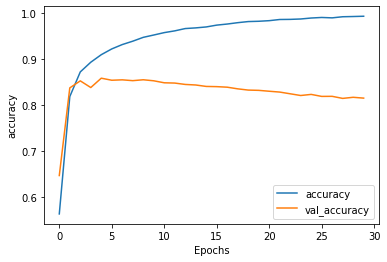

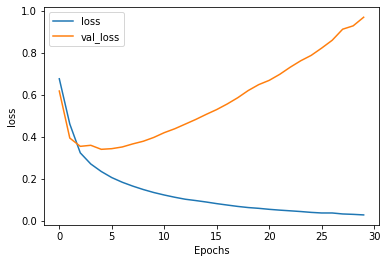

In [19]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):

  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [21]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
  return " ".join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [22]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)  # (vocab_size, embedding_dim)

(10000, 16)


In [24]:
import io

out_v = io.open('vecs2.tsv', 'w', encoding = 'utf-8')
out_m = io.open('meta2.tsv', 'w', encoding = 'utf-8')

for word_num in range(1, vocab_size):

  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + '\n')
  out_v.write('\t'.join([str(x) for x in embeddings]) + '\n')

out_v.close()
out_m.close()

In [25]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs2.tsv')
  files.download('meta2.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[9.801126e-01]
 [3.695488e-04]]
